In [1]:
from IPython.display import HTML, IFrame, YouTubeVideo, Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.style.use('seaborn-talk')

# "Tidy" Data in Python: Embracing the Long DataFrame

## Nick Del Grosso, PyData München

In [3]:
IFrame('https://www.tidyverse.org/', width=800, height=600)

## Today's Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

## Today's Data will be...

In [7]:
from statsmodels import datasets
IFrame('http://www.statsmodels.org/stable/datasets/index.html', width=900, height=600)

## Our Sample Dataset for the Evening: World Fertility Rates!

![title](https://mereorthodoxy.com/wp-content/uploads/2017/05/landscape_movies-children-of-men.jpg)

## Downloading the Data

In [8]:
from statsmodels import datasets
df = datasets.fertility.load_pandas().data
df.columns = df.columns.str.replace(' ', '')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [10]:
df.to_csv('worldbankdata.csv')

## Review of Pandas: Summarizing, Filtering, Selecting, Transforming, Aggregating, and Plotting
Cana remove: 'CountryCode', 'IndicatorName', 'IndicatorCode'

## Question: How Has Denmarks's Fertility Rate Changed over Time?

### Minor Note:  Handling NaNs

bfill 3, dropna

## Low-Level Approach: Pull Data Out to NumPy, then Analyze with Matplotlib

# Pandas Approach: Reshape and Delete to New Wide Table
Goal: Get Columns Labeled as Country Names, and Rows labeled as Years

# New Question: How has each Continent's Fertility Changed over Time?
**Problem**: I don't know the Continent name of every country. :-(
**Solution**: Look for Data online!

In [25]:
IFrame('http://techslides.com/list-of-countries-and-capitals', width=1000, height=600)

## Using Pandas to Scrape HTML Tables from Web Sites

In [26]:
countries = pd.read_html('http://techslides.com/list-of-countries-and-capitals', header=0)[0].set_index('Country Name')
countries.head()

,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
Country Name,,,,,
Afghanistan,Kabul,34.516667,69.183333,AF,Asia
Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
Albania,Tirana,41.316667,19.816667,AL,Europe
Algeria,Algiers,36.750000,3.050000,DZ,Africa
American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia


# Problem: Where Should the Data Go?
How do we cleanly associate our variables (Country, Continent, and our Years) in a 2D Structure?

## Our Options: Long Variable Names, Panels, MultiIndexing, or Long DataFrames
 
  - **Long Variable Names**: "Europe_Germany".  Ugly.
  - **Panel**: a 3D version of DataFrame.  However, it has been Deprecated.
  - **MultiIndex**: Allows multiple nesting of columns. Works, but not fully supported--it's a bit finicky in practice.
  - **Long DataFrames**: Clean, Simple to Use, and Scalable!
  

## Grouping Data using Dataframe.groupby()

apply(), transform(), agg(), aggregate()

## "Gathering" Data: Reshaping into a  "Long" Table with Pandas' melt() function

## Joining DataFrames using "Join" and "Merge"

## A Benefit of Long DataFrames: Simpler Querying

# Building Beautiful Plots with Seaborn

In [37]:
IFrame('http://seaborn.pydata.org/', width=800, height=600)

## Use Case: Time Series Plotting with Seaborn.tsplot()
It's a bit finicky (especially with NaNs), but it handles error shading in a great way!

/home/nickdg/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


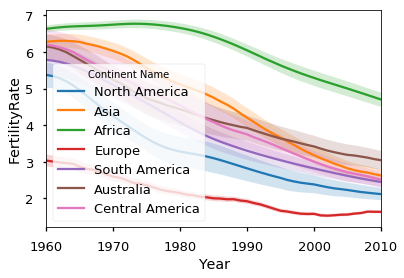

In [106]:
sns.tsplot(data=dfl, time='Year', value='FertilityRate', condition='Continent Name', unit='CountryName', ci=68)

## Seaborn's Killer Function:  factorplot()